## Importation des modules nécessaires à l'élaboration du projet

In [1]:
import pandas as pd 
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Examinons la donnée

In [2]:
attrition_data_init = pd.read_csv('/home/apprenant/PycharmProjects/Brief-10-Employees-Turnover/data/attrition_train.csv')
attrition_test_init = pd.read_csv('/home/apprenant/PycharmProjects/Brief-10-Employees-Turnover/data/attrition_test.csv')

In [3]:
attrition_data = attrition_data_init.drop(['EmployeeCount','EmployeeNumber','Over18','StandardHours'], axis =1)
attrition_test = attrition_test_init.drop(['EmployeeCount','EmployeeNumber','Over18','StandardHours'], axis =1)

In [4]:
attrition_test.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,index1
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,...,1,0,8,0,1,6,4,0,5,0
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,...,4,1,10,3,3,10,7,1,7,1
2,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,...,4,1,6,3,3,2,2,2,2,2
3,32,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,4,Male,79,...,3,0,8,2,2,7,7,3,6,3
4,29,Travel_Rarely,1389,Research & Development,21,4,Life Sciences,2,Female,51,...,3,1,10,1,3,10,9,8,8,4


In [5]:
attrition_test = attrition_test.drop('index1', axis=1)

In [6]:
attrition_data.shape

(1100, 31)

In [7]:
# attrition_data.columns

In [8]:
# attrition_test.columns

In [9]:
attrition_test.shape

(370, 30)

In [10]:
attrition_data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole  

In [11]:
attrition_data.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,...,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,36.854545,804.234545,9.301818,2.907273,2.730909,66.011818,2.707273,2.064545,2.737273,6536.102727,...,3.155455,2.697273,0.785455,11.206364,2.780909,2.780909,7.070000,4.250000,2.186364,4.199091
std,9.039229,405.583238,8.093392,1.012453,1.083564,20.374359,0.731298,1.115862,1.107125,4729.940355,...,0.362502,1.084338,0.848575,7.784761,1.309377,0.706269,6.147387,3.595094,3.234650,3.584848
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1051.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,460.500000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2906.500000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,805.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4938.500000,...,3.000000,3.000000,1.000000,9.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,42.250000,1162.000000,14.000000,4.000000,4.000000,84.000000,3.000000,3.000000,4.000000,8516.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1498.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,...,4.000000,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


In [12]:
# attrition_data.isna().sum()

0 valeur manquante donc RAS

In [13]:
attrition_data.Attrition.unique()

array(['No', 'Yes'], dtype=object)

## Création de notre modèle

### Encodage de nos variables catégorielles

In [14]:
attrition_data.select_dtypes('object')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,No,Travel_Frequently,Research & Development,Life Sciences,Female,Manufacturing Director,Single,Yes
1,No,Travel_Frequently,Research & Development,Medical,Female,Manufacturing Director,Married,Yes
2,No,Non-Travel,Research & Development,Life Sciences,Female,Laboratory Technician,Married,No
3,No,Travel_Rarely,Research & Development,Life Sciences,Male,Research Director,Married,No
4,No,Non-Travel,Research & Development,Medical,Male,Research Scientist,Married,No
...,...,...,...,...,...,...,...,...
1095,No,Travel_Rarely,Research & Development,Life Sciences,Male,Research Director,Single,No
1096,No,Travel_Rarely,Human Resources,Life Sciences,Female,Human Resources,Married,No
1097,No,Travel_Rarely,Research & Development,Life Sciences,Male,Healthcare Representative,Single,Yes
1098,No,Non-Travel,Research & Development,Technical Degree,Male,Manufacturing Director,Married,No


In [15]:
cat_vars = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']

for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(attrition_data[var], prefix=var)
    data1=attrition_data.join(cat_list)
    attrition_data=data1

cat_vars2 = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']

for var in cat_vars2:
    cat_list2='var'+'_'+var
    cat_list2 = pd.get_dummies(attrition_test[var], prefix=var)
    data2=attrition_test.join(cat_list2)
    attrition_test=data2

In [16]:
attrition_data_numbers = attrition_data.drop(cat_vars, axis=1)

In [17]:
attrition_test_numbers = attrition_test.drop(cat_vars2, axis=1)

In [18]:
attrition_data['Attrition'] = attrition_data['Attrition'].replace(['Yes', 'No'], [1, 0])
attrition_data_numbers = attrition_data_numbers.drop('Attrition', axis=1)

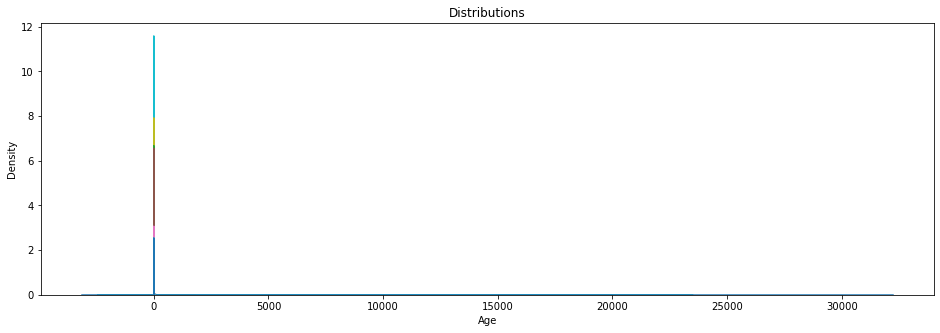

In [19]:
fig, a = plt.subplots(ncols=1, figsize=(16, 5))
a.set_title("Distributions")
for col in attrition_data_numbers.columns:
    sns.kdeplot(attrition_data_numbers[col], ax=a)
plt.show()

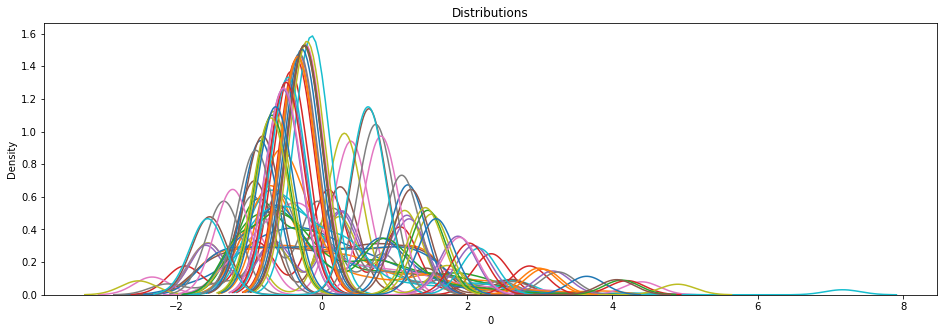

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(attrition_data_numbers)
scaled_df = pd.DataFrame(scaled_df)

fig, a = plt.subplots(ncols=1, figsize=(16, 5))
a.set_title("Distributions")
for col in scaled_df.columns:
    sns.kdeplot(scaled_df[col], ax=a)
plt.show()


In [21]:
attrition_data_numbers = scaled_df

### Mise en place de notre modèle de régression logistique

In [22]:
# attrition_data['Attrition'] = attrition_data['Attrition'].replace(['Yes', 'No'], [1, 0])

In [23]:
# attrition_data['Attrition']

In [24]:
y = attrition_data['Attrition']
# X = attrition_data_numbers.drop('Attrition', axis=1)
X = attrition_data_numbers
X_pred = attrition_test_numbers
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [25]:
X_pred.shape

(370, 51)

In [26]:
X.shape

(1100, 51)

In [27]:
my_model = LogisticRegression(C = 10, penalty = 'l2',solver='liblinear')

In [28]:
my_model.fit(X_train, y_train)

LogisticRegression(C=10, solver='liblinear')

In [29]:
prediction = my_model.predict(X_test)

In [30]:
print(prediction)

[0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1]


In [31]:
score = my_model.score(X_test, y_test)
print('Test Accuracy Score :', score)

Test Accuracy Score : 0.8681818181818182


In [32]:
print('F-mesure :', f1_score(y_test,prediction, average="macro"))

F-mesure : 0.724036506769324


In [33]:
cnf_matrix = metrics.confusion_matrix(y_test, prediction)
cnf_matrix

array([[175,   9],
       [ 20,  16]])

Text(0.5, 257.44, 'Predicted label')

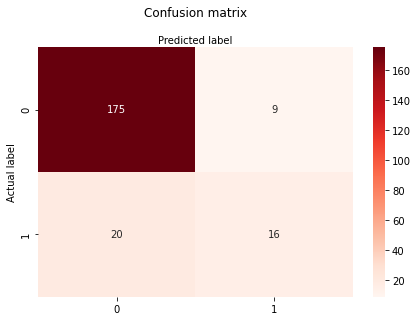

In [34]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Reds" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### ROC

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.833


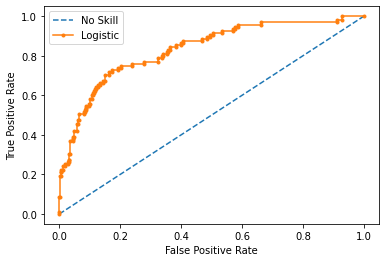

In [35]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(testy))]
# fit a model
my_model.fit(trainX, trainy)
# predict probabilities
lr_probs = my_model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()


### RFE

In [36]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

In [37]:
# selector = RFECV(my_model, step=1, cv=5)

In [38]:
# selector = selector.fit(X, y)

In [39]:
# plt.figure()
# plt.xlabel("Number of features selected")
# plt.ylabel("Cross validation score (nb of correct classifications)")
# plt.plot(range(1,
#                len(selector.grid_scores_) + 1),
#          selector.grid_scores_)
# plt.show()

Optimal number of features in X_RFE : 41
estimator LogisticRegression(C=10, solver='liblinear')


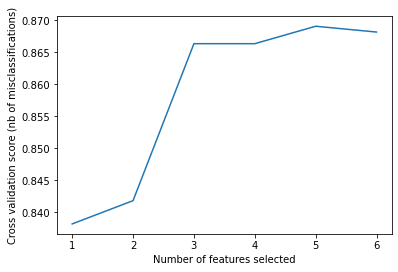

In [40]:
# Create the RFE object and compute a cross-validated score.
svc=LogisticRegression(C = 10, penalty = 'l2',solver='liblinear')

rfecv = RFECV(estimator=svc, step=0.2, cv=2)
X_RFE = rfecv.fit_transform(X, y)

print("Optimal number of features in X_RFE : %d" % rfecv.n_features_)
print("estimator",rfecv.estimator_)
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of misclassifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()




### Prédictions à partir de notre jeu de données test

In [41]:
my_model.fit(X,y)

LogisticRegression(C=10, solver='liblinear')

In [42]:
prediction2 = my_model.predict(X_pred)

In [43]:
my_model.predict_proba(X_test)[:,1]

array([1.85070002e-02, 2.63002312e-01, 6.13142098e-03, 1.59519440e-01,
       2.24564702e-01, 1.29942164e-02, 6.26830126e-02, 3.21242065e-02,
       1.25765634e-02, 4.97711534e-02, 1.80261849e-02, 1.53125635e-01,
       8.18589926e-01, 4.22862591e-02, 5.70393963e-01, 2.70314159e-02,
       1.35239989e-02, 1.12898926e-01, 3.66147262e-02, 2.11162195e-02,
       6.35045074e-02, 1.76109853e-01, 1.26536227e-01, 3.36478171e-01,
       1.36012154e-02, 3.11799210e-02, 1.04264690e-01, 3.97697014e-01,
       3.33601412e-01, 3.91935481e-03, 1.02773552e-02, 3.28406106e-03,
       4.05549593e-02, 9.36022448e-03, 4.86624790e-03, 3.05130957e-02,
       2.38364620e-04, 1.12603515e-02, 1.13478234e-01, 8.94279370e-01,
       3.71952621e-02, 6.15219048e-01, 2.30493828e-02, 5.34513677e-01,
       3.30568347e-02, 2.24163847e-01, 1.19655360e-01, 1.55393196e-01,
       4.66257235e-02, 3.04551639e-02, 2.90140334e-01, 1.16677712e-01,
       1.77968330e-01, 1.77300645e-02, 8.09660548e-02, 3.27085286e-02,
      

In [44]:
print(prediction2)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [45]:
attrition_test['EmployeeNumber'] = attrition_data_init['EmployeeNumber']

In [46]:
employees = attrition_test['EmployeeNumber']

In [47]:
employees2 = pd.DataFrame(data = prediction2, columns = ['Predictions'])

In [48]:
employees = pd.DataFrame(data = attrition_test['EmployeeNumber'], columns = ['EmployeeNumber'])

In [49]:
employees['Predictions'] = employees2

In [50]:
employees.Predictions.value_counts()

0    344
1     26
Name: Predictions, dtype: int64